In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
# Load Titanic training dataset from local CSV file
df = pd.read_csv("train.csv")

# Display first 5 rows to verify the data is loaded correctly
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Get descriptive statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.drop(columns=['Cabin'], inplace=True)

In [12]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
# Convert 'Sex' and 'Embarked' columns to category type
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [16]:
# Check the new data types
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [18]:
df.groupby('Sex', observed=True)['Survived'].mean()
df.groupby('Pclass', observed=True)['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [19]:
df.groupby('Sex', observed=True)['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [20]:
# Display the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(df))

Number of rows before removing duplicates: 891


In [21]:
# Remove duplicate rows if any exist
df.drop_duplicates(inplace=True)

In [23]:
# Display the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df))

Number of rows after removing duplicates: 891


In [24]:
# Summary statistics for numerical columns
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [25]:
# Summary statistics for categorical columns
print(df.describe(include='category'))

         Sex Embarked
count    891      891
unique     2        3
top     male        S
freq     577      646


In [26]:
# Survival rate by Gender
survival_by_gender = df.groupby('Sex', observed=True)['Survived'].mean()
print("Survival Rate by Gender:\n", survival_by_gender)

Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [27]:
# Survival rate by Passenger Class
survival_by_class = df.groupby('Pclass', observed=True)['Survived'].mean()
print("Survival Rate by Passenger Class:\n", survival_by_class)

Survival Rate by Passenger Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


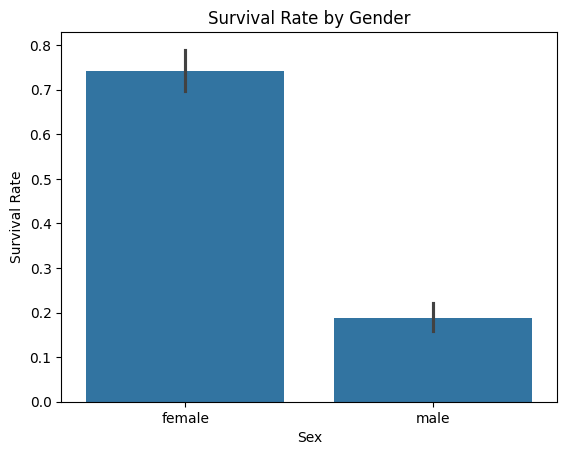

In [28]:
# Bar plot for survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

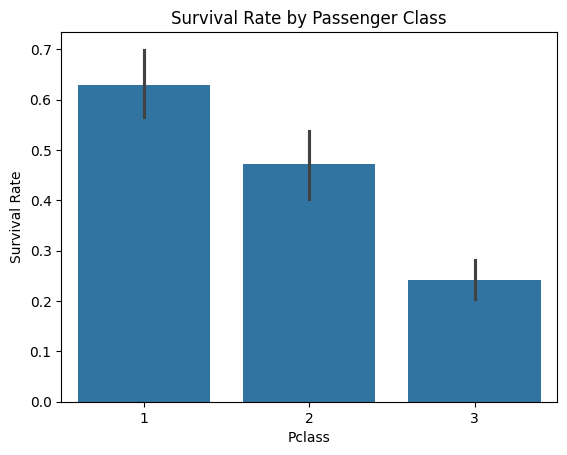

In [29]:
# 2. Bar Plot for Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [31]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()

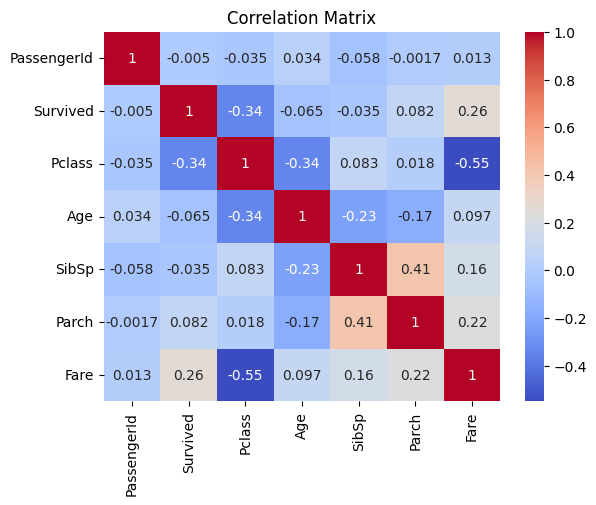

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

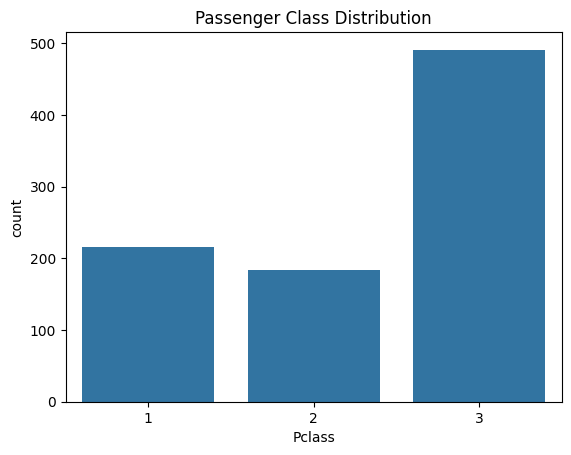

In [34]:
#Count Plot for Passenger Class Distribution
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

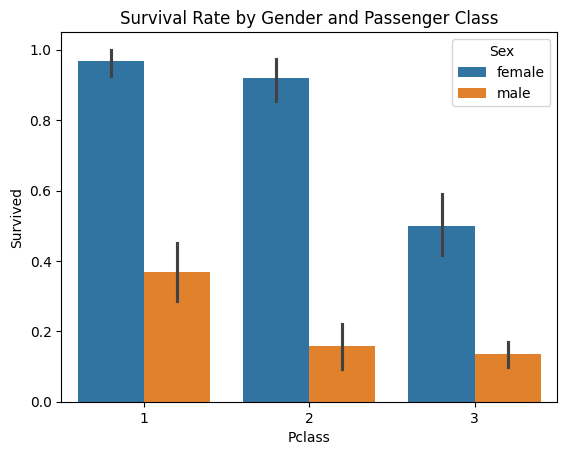

In [35]:
# 5. Survival Rate by Both Gender and Class (Grouped Bar Plot)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

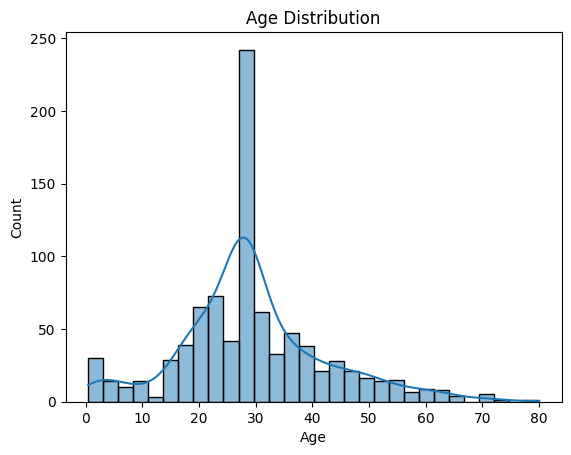

In [36]:
# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

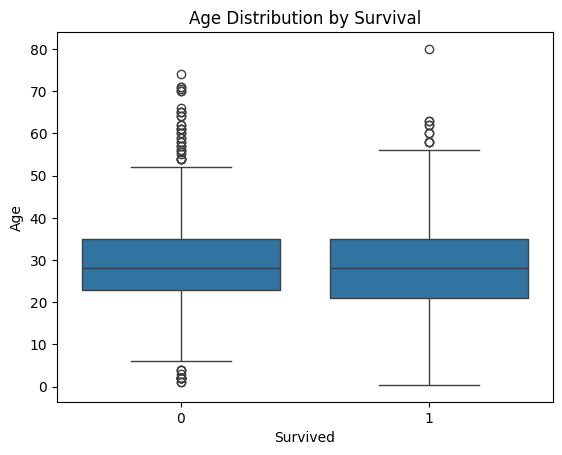

In [37]:
# Age Distribution by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

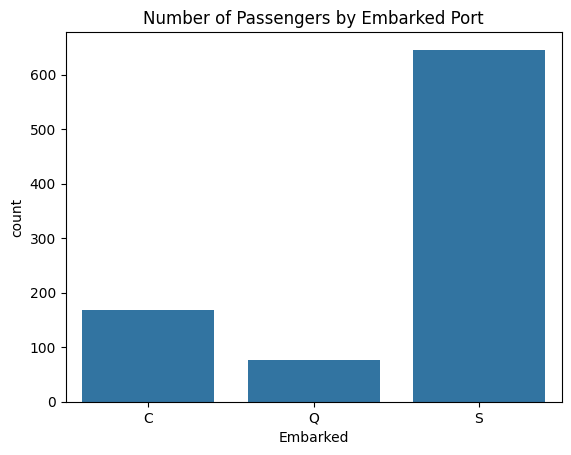

In [38]:
# Number of Passengers by Embarked Port
sns.countplot(x='Embarked', data=df)
plt.title('Number of Passengers by Embarked Port')
plt.show()

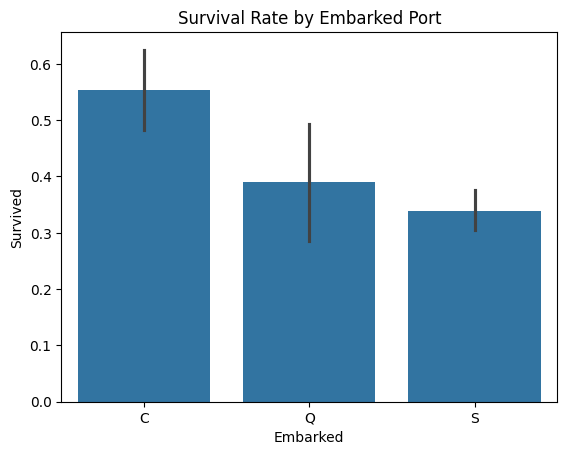

In [39]:
# Survival Rate by Embarked Port
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.show()

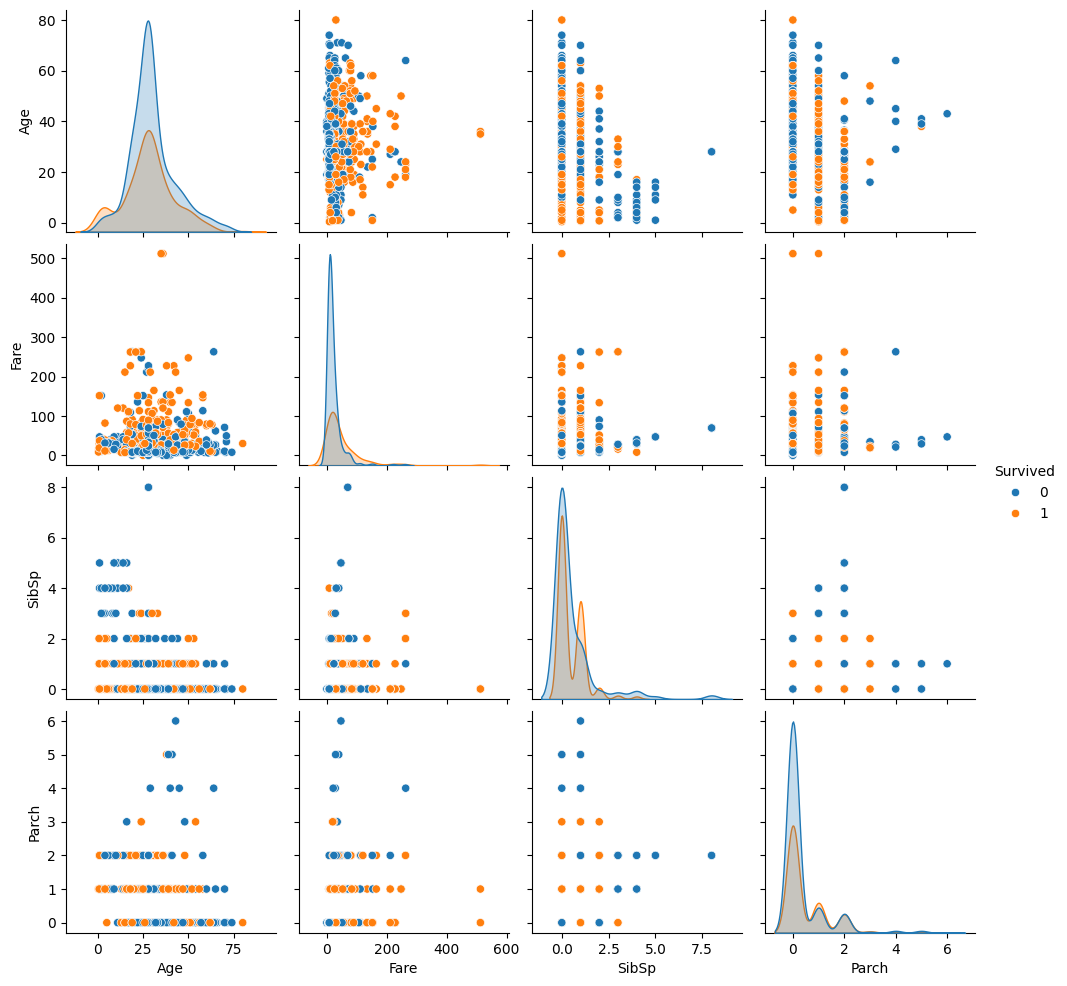

In [40]:
# Pairplot of Numerical Variables by Survival
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp', 'Parch'], hue='Survived')
plt.show()

In [42]:
# Calculate the average survival rate grouped by Gender and Passenger Class
grouped = df.groupby(['Sex', 'Pclass'], observed=True)['Survived'].mean().reset_index()

In [43]:
# Convert grouped data to matrix form using unstack (بديل للpivot)
heatmap_data = grouped.set_index(['Sex', 'Pclass'])['Survived'].unstack()

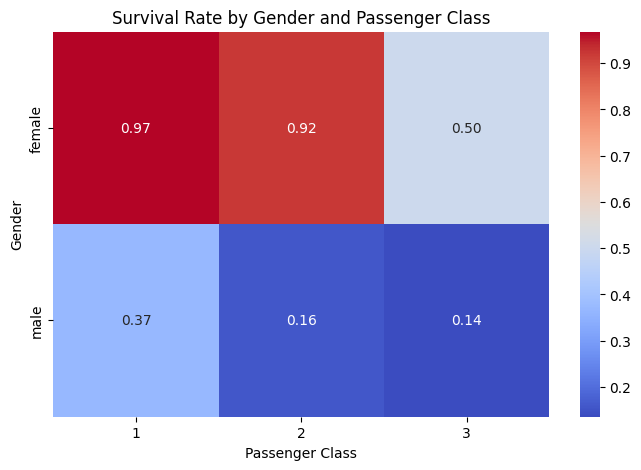

In [44]:
# Plot the heatmap with annotations
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Survival Rate by Gender and Passenger Class')
plt.ylabel('Gender')
plt.xlabel('Passenger Class')
plt.show()